## thinning Ops

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@1fed040c

This op performs [morphological thinning](https://en.wikipedia.org/wiki/Thinning_(morphology)) on any binary image. If you are not familiar with the concept of thinning, check out [skeletonization](https://en.wikipedia.org/wiki/Topological_skeleton), a very similar concept. Let's see how the `Op` is called:

In [2]:
ij.op().help("thinGuoHall")

Available operations:
	(RandomAccessibleInterval out?) =
	net.imagej.ops.morphology.thin.ThinGuoHall(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in)

The thinning `Ops` are pretty straight forward, where all we need is an input image (as well as a preallocated output, if you have one).

We need to get a binary image to perform any morphological operations. Let's get a grayscale image and then binarize it using [the Huang Threshold Op](../threshold/threshold.ipynb#Huang-Thresholding):

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


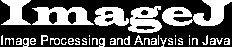

In [3]:
import net.imglib2.FinalInterval

input_full = ij.scifio().datasetIO().open("http://imagej.net/images/logo.gif")

//input_full has 3 channels. We only need one.
input = ij.op().run("hyperSliceView", input_full, 2, 0)

//invert the image so that the blobs are "on" and the background "off"
inverted = ij.op().run("create.img", input)
ij.op().run("invert", inverted, input)

binary = ij.op().run("threshold.huang", inverted)

ij.notebook().display(binary)

Now that we have our image, let's thin it using all four of the thinning `Op`s so that we can see the difference between each one:

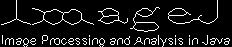

In [4]:
guoHall = ij.op().run("thinGuoHall", null, binary)

ij.notebook().display(guoHall)

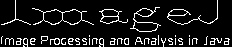

In [5]:
hilditch = ij.op().run("thinHilditch", null, binary)

ij.notebook().display(hilditch)

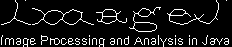

In [6]:
morphological = ij.op().run("thinMorphological", null, binary)

ij.notebook().display(morphological)

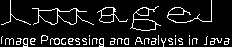

In [7]:
zhangSuen = ij.op().run("thinZhangSuen", null, binary)

ij.notebook().display(zhangSuen)